In [1]:
# 🧠 SymPy Basics – Before We Begin
# This section introduces symbolic math tools you'll need in the rest of the tutorial.

from sympy import symbols, Function, diff, integrate, limit, sin, cos, Eq, solve
from sympy import init_printing
init_printing()  # Pretty LaTeX-like math rendering


## 🧠 SymPy Basics – Before We Begin

Before jumping into Lagrangian mechanics, let's take a moment to get familiar with SymPy, the symbolic math library in Python.

We'll learn how to:

- Calculate **derivatives**
- Compute **integrals**
- Evaluate **limits**
- **Solve** equations



### 🔹 Derivatives

To compute symbolic derivatives, use `diff()`.

Example: the derivative of $ x^2 \sin(x) $


In [2]:
x = symbols('x')
expr = x**2 * sin(x)
diff(expr, x)


### 🔹 Integrals

Use `integrate()` to compute integrals.

Example: the indefinite integral of $ x \cos(x) $


In [3]:
integrate(x * cos(x), x)


### 🔹 Limits

You can evaluate limits using `limit()`.

Example: $ \lim_{x \to 0} \frac{\sin(x)}{x} $


In [4]:
limit(sin(x)/x, x, 0)


### 🔹 Solving Equations

Use `Eq()` to define an equation and `solve()` to solve it.

Example: Solve $ x^2 - 2 = 0 $



In [5]:
eq = Eq(x**2 - 2, 0)
solve(eq, x)


# 📓 Lagrangian Mechanics Tutorial
## 🔹 Example 1: Point Mass under Gravity


<img src="point_mass.png" width="300" />

In [6]:
from sympy import symbols, Function, diff, simplify
from sympy.physics.mechanics import dynamicsymbols 
from sympy import init_printing

init_printing()  # Pretty LaTeX-like printing in notebook

## 🔹 1. Define Coordinates and Time
We will consider a single point mass $m$ moving vertically under gravity.  
Let $y(t)$ be the vertical position of the mass.

In [7]:
t = symbols('t')                      # Time
y = Function('y')(t)                # Vertical position y(t)
m, g = symbols('m g')              # Mass and gravitational acceleration

## 🔹 2. Kinetic Energy $T$
The kinetic energy of the mass is:

$$
T = \frac{1}{2} m \dot{y}^2
$$

In [8]:
y_dot = diff(y, t)
T = (1/2) * m * y_dot**2
T

## 🔹 3. Potential Energy $V$
Assume potential energy is zero at $y = 0$.  
Then:

$$
V = m g y
$$

In [9]:
V = m * g * y
V

## 🔹 4. Lagrangian $L = T - V$

$$
L = T - V = \frac{1}{2} m \dot{y}^2 - m g y
$$

In [10]:
L = T - V
L

## 🔹 5. Apply Euler-Lagrange Equation
The Lagrange equation is:

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{y}} \right) - \frac{\partial L}{\partial y} = 0
$$

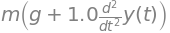

In [11]:
dL_dy = diff(L, y)
dL_dy_dot = diff(L, y_dot)
d_dt_dL_dy_dot = diff(dL_dy_dot, t)
lagrange_eq = simplify(d_dt_dL_dy_dot - dL_dy)
lagrange_eq

To obtain equation of motion, we want to express $\ddot{y} = f(\dot{y}, {y},..., t)$ 

## ✅ Final Result
In this case it should be:

$$
\ddot{y} = -g
$$

In [12]:
from sympy import Eq, solve

y_ddot = diff(y, t, t)
eq = Eq(lagrange_eq, 0)
sol = solve(eq, y_ddot)
sol

Now we have the equation of motion. However we want to solve it to get $y$ and $\dot{y}$. Which basicaly means, that we want to integrate it. Or we can call _sympy.dsolve_ to solve the differential equation.

In [13]:
from sympy import dsolve

# Solve the differential equation
ode = Eq(diff(y, t, t), sol[0])
sol = dsolve(ode, y)
sol

where $C_1$ stands for initial position $y_0$ and $C_2$ stands for initial velocity $\dot{y_0}$

## 🌟 Conclusion
We successfully derived the equation of motion for a free-falling point mass using Lagrangian mechanics and symbolic math in Python!